# Chargement des bibliothèques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
#######
from numpy import isnan
from pandas import read_csv
%matplotlib inline

# Chargement des données

In [2]:
start_time = time.time()  # Capture le temps au début
df_incident_2009_2017_NoIndex = pd.read_csv("../raw_data/LFB Incident data from 2009 - 2017.csv", low_memory=False)
df_incident_2018_2024_NoIndex = pd.read_csv("../raw_data/LFB Incident data from 2018 onwards.csv", low_memory=False)
df_mobilisation_2009_2014_NoIndex = pd.read_csv("../raw_data/LFB Mobilisation data from January 2009 - 2014.csv", low_memory=False)
df_mobilisation_2015_2020_NoIndex = pd.read_csv("../raw_data/LFB Mobilisation data from 2015 - 2020.csv", low_memory=False)
df_mobilisation_2021_2024_NoIndex = pd.read_csv("../raw_data/LFB Mobilisation data 2021 - 2024.csv", low_memory=False)
end_time = time.time()  # Capture le temps à la fin
execution_time = end_time - start_time
print(f"Temps d'exécution : {execution_time} secondes")

Temps d'exécution : 14.643980979919434 secondes


# Concaténation

In [3]:
df_incident = pd.concat([df_incident_2009_2017_NoIndex, df_incident_2018_2024_NoIndex], axis=0, ignore_index=True)

In [4]:
df_incident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1735980 entries, 0 to 1735979
Data columns (total 39 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   IncidentNumber                          object 
 1   DateOfCall                              object 
 2   CalYear                                 int64  
 3   TimeOfCall                              object 
 4   HourOfCall                              int64  
 5   IncidentGroup                           object 
 6   StopCodeDescription                     object 
 7   SpecialServiceType                      object 
 8   PropertyCategory                        object 
 9   PropertyType                            object 
 10  AddressQualifier                        object 
 11  Postcode_full                           object 
 12  Postcode_district                       object 
 13  UPRN                                    float64
 14  USRN                              

In [5]:
df_mobilisation = pd.concat([df_mobilisation_2009_2014_NoIndex, df_mobilisation_2015_2020_NoIndex, df_mobilisation_2021_2024_NoIndex],
                            axis=0, ignore_index=True)

In [6]:
df_mobilisation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2423948 entries, 0 to 2423947
Data columns (total 22 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   IncidentNumber            object 
 1   CalYear                   int64  
 2   HourOfCall                int64  
 3   ResourceMobilisationId    int64  
 4   Resource_Code             object 
 5   PerformanceReporting      object 
 6   DateAndTimeMobilised      object 
 7   DateAndTimeMobile         object 
 8   DateAndTimeArrived        object 
 9   TurnoutTimeSeconds        float64
 10  TravelTimeSeconds         float64
 11  AttendanceTimeSeconds     int64  
 12  DateAndTimeLeft           object 
 13  DateAndTimeReturned       object 
 14  DeployedFromStation_Code  object 
 15  DeployedFromStation_Name  object 
 16  DeployedFromLocation      object 
 17  PumpOrder                 int64  
 18  PlusCode_Code             object 
 19  PlusCode_Description      object 
 20  DelayCodeId             

# Analyse des valeurs manquantes

In [26]:
df_mobilisation.isnull().sum()/len(df_mobilisation)*100

IncidentNumber               0.000000
CalYear                      0.000000
HourOfCall                   0.000000
ResourceMobilisationId       0.000000
Resource_Code                0.000000
PerformanceReporting         0.000000
DateAndTimeMobilised         0.000000
DateAndTimeMobile            1.160545
DateAndTimeArrived           0.000000
TurnoutTimeSeconds           1.166155
TravelTimeSeconds            1.169951
AttendanceTimeSeconds        0.000000
DateAndTimeLeft              1.915223
DateAndTimeReturned         59.852357
DeployedFromStation_Code     0.001114
DeployedFromStation_Name     0.001114
DeployedFromLocation         0.048763
PumpOrder                    0.000000
PlusCode_Code                0.000000
PlusCode_Description         0.000000
DelayCodeId                 75.125044
DelayCode_Description       75.125044
dtype: float64

In [25]:
df_incident.isnull().sum()/len(df_incident)*100

IncidentNumber                             0.000000
DateOfCall                                 0.000000
CalYear                                    0.000000
TimeOfCall                                 0.000000
HourOfCall                                 0.000000
IncidentGroup                              0.000346
StopCodeDescription                        0.000000
SpecialServiceType                        67.630099
PropertyCategory                           0.000346
PropertyType                               0.000346
AddressQualifier                           0.000058
Postcode_full                             49.753281
Postcode_district                          0.000000
UPRN                                       8.141396
USRN                                       9.382078
IncGeo_BoroughCode                         0.000000
IncGeo_BoroughName                         0.000000
ProperCase                                 0.000000
IncGeo_WardCode                            0.024482
IncGeo_WardN

# Analyse des valeurs uniques

In [69]:
df_mobilisation['IncidentNumber'].nunique()

1608439

In [70]:
df_mobilisation['IncidentNumber'].value_counts().value_counts()

count
1     986874
2     494943
3      85780
5      23870
4      15820
6        942
7        132
8         68
9          7
11         2
13         1
Name: count, dtype: int64

In [71]:
df_mobilisation['PumpOrder'].value_counts()

PumpOrder
1     1608439
2      621565
3      126622
4       40842
5       25022
6        1152
7         210
8          78
9          10
11          3
10          3
12          1
13          1
Name: count, dtype: int64

In [11]:
df_incident['IncidentNumber'].nunique()

1735980

In [30]:
df_incident['IncidentNumber'].value_counts().value_counts()

count
1    1735980
Name: count, dtype: int64

In [14]:
for col in df_incident.columns:
    print(col, df_incident[col].nunique())

IncidentNumber 1735980
DateOfCall 5691
CalYear 16
TimeOfCall 86391
HourOfCall 24
IncidentGroup 3
StopCodeDescription 11
SpecialServiceType 21
PropertyCategory 9
PropertyType 292
AddressQualifier 11
Postcode_full 118831
Postcode_district 329
UPRN 282472
USRN 53572
IncGeo_BoroughCode 33
IncGeo_BoroughName 33
ProperCase 33
IncGeo_WardCode 899
IncGeo_WardName 1484
IncGeo_WardNameNew 1481
Easting_m 51690
Northing_m 40147
Easting_rounded 574
Northing_rounded 448
Latitude 562967
Longitude 565668
FRS 1
IncidentStationGround 103
FirstPumpArriving_AttendanceTime 1200
FirstPumpArriving_DeployedFromStation 117
SecondPumpArriving_AttendanceTime 1200
SecondPumpArriving_DeployedFromStation 114
NumStationsWithPumpsAttending 23
NumPumpsAttending 31
PumpCount 128
PumpMinutesRounded 2999
Notional Cost (£) 6985
NumCalls 98


In [16]:
for col in df_mobilisation.columns:
    print(col, df_mobilisation[col].nunique())

IncidentNumber 1608439
CalYear 16
HourOfCall 24
ResourceMobilisationId 2423948
Resource_Code 187
PerformanceReporting 3
DateAndTimeMobilised 1633509
DateAndTimeMobile 2376048
DateAndTimeArrived 2408219
TurnoutTimeSeconds 892
TravelTimeSeconds 1193
AttendanceTimeSeconds 1201
DateAndTimeLeft 2364875
DateAndTimeReturned 961091
DeployedFromStation_Code 126
DeployedFromStation_Name 126
DeployedFromLocation 2
PumpOrder 13
PlusCode_Code 3
PlusCode_Description 3
DelayCodeId 10
DelayCode_Description 10


# Analyse des redondances avec des tableaux de fréquences

## Tableau de fréquences pour IncGeo_BoroughCode et IncGeo_BoroughName

In [7]:
pd.crosstab(df_incident['IncGeo_BoroughCode'], df_incident['IncGeo_BoroughName'])

IncGeo_BoroughName,BARKING AND DAGENHAM,BARNET,BEXLEY,BRENT,BROMLEY,CAMDEN,CITY OF LONDON,CROYDON,EALING,ENFIELD,...,MERTON,NEWHAM,REDBRIDGE,RICHMOND UPON THAMES,SOUTHWARK,SUTTON,TOWER HAMLETS,WALTHAM FOREST,WANDSWORTH,WESTMINSTER
IncGeo_BoroughCode,,,,,,,,,,,,,,,,,,,,,
E09000001,0,0,0,0,0,0,19057,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E09000002,35001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E09000003,0,57516,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E09000004,0,0,35154,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E09000005,0,0,0,51680,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E09000006,0,0,0,0,49066,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E09000007,0,0,0,0,0,84603,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E09000008,0,0,0,0,0,0,0,65821,0,0,...,0,0,0,0,0,0,0,0,0,0
E09000009,0,0,0,0,0,0,0,0,58011,0,...,0,0,0,0,0,0,0,0,0,0


## Tableau de fréquences pour IncGeo_BoroughCode et ProperCase

In [8]:
pd.crosstab(df_incident['IncGeo_BoroughCode'], df_incident['ProperCase'])

ProperCase,Barking And dagenham,Barnet,Bexley,Brent,Bromley,Camden,City Of london,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond Upon thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
IncGeo_BoroughCode,,,,,,,,,,,,,,,,,,,,,
E09000001,0,0,0,0,0,0,19057,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E09000002,35001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E09000003,0,57516,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E09000004,0,0,35154,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E09000005,0,0,0,51680,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E09000006,0,0,0,0,49066,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E09000007,0,0,0,0,0,84603,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E09000008,0,0,0,0,0,0,0,65821,0,0,...,0,0,0,0,0,0,0,0,0,0
E09000009,0,0,0,0,0,0,0,0,58011,0,...,0,0,0,0,0,0,0,0,0,0


## Tableau de fréquences pour DeployedFromStation_Code et DeployedFromStation_Name

In [9]:
pd.crosstab(df_mobilisation['DeployedFromStation_Code'], df_mobilisation['DeployedFromStation_Name'])

DeployedFromStation_Name,Acton,Addington,Barking,Barnet,Battersea,Beckenham,Belsize,Bethnal Green,Bexley,Biggin Hill,...,Wennington,West Hampstead,West Norwood,Westminster,Whitechapel,Willesden,Wimbledon,Woodford,Woodside,Woolwich
DeployedFromStation_Code,,,,,,,,,,,,,,,,,,,,,
A21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,7289,0,0,0,0,0,0
A26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
S17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
S20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Tableau de fréquences pour DelayCodeId et DelayCode_Description

In [10]:
pd.crosstab(df_mobilisation['DelayCodeId'], df_mobilisation['DelayCode_Description'])

DelayCode_Description,Address incomplete/wrong,Appliance/Equipment defect,Arrived but held up - Other reason,At drills when mobilised,Mob/Radio problems when mobilised,Not held up,On outside duty when mobilised,Traffic calming measures,"Traffic, roadworks, etc",Weather conditions
DelayCodeId,,,,,,,,,,
3.0,0,0,0,2768,0,0,0,0,0,0
5.0,36246,0,0,0,0,0,0,0,0,0
6.0,0,3065,0,0,0,0,0,0,0,0
7.0,0,0,19418,0,0,0,0,0,0,0
8.0,0,0,0,0,0,0,0,37647,0,0
9.0,0,0,0,0,0,0,0,0,117542,0
10.0,0,0,0,0,0,0,0,0,0,7134
11.0,0,0,0,0,9843,0,0,0,0,0
12.0,0,0,0,0,0,360038,0,0,0,0


# Analyse des donnée de type "FirstPump"

In [49]:
print(df_incident['FirstPumpArriving_DeployedFromStation'].values)

['Battersea' nan 'Edmonton' ... 'Lee Green' 'Chingford' 'West Norwood']


In [36]:
print(df_incident['FirstPumpArriving_AttendanceTime'].isna().sum(axis=0))

133754


In [37]:
1735980 - 133754

1602226

In [39]:
1608439 - 1602226

6213

# Analyse des numéros d'incidents

## Analyse des numéros d'incidents dans Mobilisation

In [91]:
IncidentNumbers_in_MobilisationData = pd.Series(df_mobilisation['IncidentNumber'].unique())

In [92]:
len(IncidentNumbers_in_MobilisationData)

1608439

In [93]:
IncidentNumbers_in_MobilisationData[IncidentNumbers_in_MobilisationData.isin(df_incident['IncidentNumber'])]

693226     160002-17112015
693227     160003-17112015
693228     160005-17112015
693229     160006-17112015
693230     160007-17112015
                ...       
1608434    125488-31072024
1608435    125491-31072024
1608436    125492-31072024
1608437    125496-31072024
1608438    125499-31072024
Length: 910718, dtype: object

In [94]:
IncidentNumbers_in_MobilisationData[~IncidentNumbers_in_MobilisationData.isin(df_incident['IncidentNumber'])]

0                235138081
1                     2091
2                     3091
3                     5091
4                     6091
                ...       
1607349    123498-28072024
1607418    123632-28072024
1607707    124134-29072024
1607846    124371-29072024
1607996    124663-29072024
Length: 697721, dtype: object

In [95]:
910718 + 697721

1608439

## Analyse des numéros d'incidents dans Incident

In [73]:
IncidentNumbers_in_IncidentData = df_incident['IncidentNumber']

In [81]:
IncidentNumbers_in_IncidentData[IncidentNumbers_in_IncidentData.isin(df_mobilisation['IncidentNumber'])]

768033     162970-23112015
768219     160003-17112015
768220     160002-17112015
768221     160005-17112015
768222     160006-17112015
                ...       
1735588    125489-31072024
1735589    125491-31072024
1735590    125492-31072024
1735591    125496-31072024
1735592    125499-31072024
Name: IncidentNumber, Length: 910718, dtype: object

In [75]:
IncidentNumbers_in_IncidentData[~IncidentNumbers_in_IncidentData.isin(df_mobilisation['IncidentNumber'])]

0             235138081.00
1                  1091.00
2                  2091.00
3                  3091.00
4                  5091.00
                ...       
1735975    126223-31072024
1735976    126225-31072024
1735977    126229-31072024
1735978    126233-31072024
1735979    126234-31072024
Name: IncidentNumber, Length: 825262, dtype: object

## Comparaison des numéros d'incidents entre les tables Incident et Mobilisation

In [76]:
df_incident['IncidentNumber']

0             235138081.00
1                  1091.00
2                  2091.00
3                  3091.00
4                  5091.00
                ...       
1735975    126223-31072024
1735976    126225-31072024
1735977    126229-31072024
1735978    126233-31072024
1735979    126234-31072024
Name: IncidentNumber, Length: 1735980, dtype: object

In [77]:
df_mobilisation['IncidentNumber']

0                235138081
1                235138081
2                     2091
3                     3091
4                     5091
                ...       
2423943    125491-31072024
2423944    125492-31072024
2423945    125496-31072024
2423946    125499-31072024
2423947    125323-30072024
Name: IncidentNumber, Length: 2423948, dtype: object

In [79]:
df_mobilisation.tail(10)

,IncidentNumber,CalYear,HourOfCall,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,...,DateAndTimeLeft,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description
2423938,125489-31072024,2024,0,6725200,A242,1,2024-07-30 23:40:00,2024-07-30 23:41:41,2024-07-30 23:44:40,101.0,...,2024-07-30 23:59:36,NaN,A24,Soho,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
2423939,125489-31072024,2024,0,6725201,A241,2,2024-07-30 23:40:00,2024-07-30 23:41:28,2024-07-30 23:44:51,88.0,...,2024-07-30 23:57:03,NaN,A24,Soho,Home Station,2,Initial,Initial Mobilisation,NaN,NaN
2423940,125489-31072024,2024,0,6725202,H221,Not Used,2024-07-30 23:40:00,2024-07-30 23:41:53,2024-07-30 23:46:30,113.0,...,2024-07-30 23:54:47,NaN,H22,Lambeth,Home Station,3,Initial,Initial Mobilisation,NaN,NaN
2423941,125488-31072024,2024,0,6725209,A322,1,2024-07-30 23:47:23,2024-07-30 23:48:48,2024-07-30 23:50:37,85.0,...,2024-07-30 23:58:17,NaN,A32,Hornsey,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
2423942,125491-31072024,2024,0,6725210,F421,1,2024-07-30 23:48:42,2024-07-30 23:50:00,2024-07-30 23:58:17,78.0,...,2024-07-31 00:08:03,NaN,F42,Ilford,Home Station,1,Initial,Initial Mobilisation,12.0,Not held up
2423943,125491-31072024,2024,0,6725211,F301,2,2024-07-30 23:48:42,2024-07-30 23:50:25,2024-07-30 23:59:32,103.0,...,2024-07-31 00:01:41,NaN,F30,Leytonstone,Home Station,2,Initial,Initial Mobilisation,12.0,Not held up
2423944,125492-31072024,2024,0,6725212,F261,1,2024-07-30 23:49:43,2024-07-30 23:52:35,2024-07-30 23:56:04,172.0,...,2024-07-31 00:10:25,NaN,F26,Bethnal Green,Home Station,1,Initial,Initial Mobilisation,11.0,Mob/Radio problems when mobilised
2423945,125496-31072024,2024,0,6725214,A301,1,2024-07-30 23:54:01,2024-07-30 23:55:20,2024-07-30 23:59:09,79.0,...,2024-07-31 00:21:08,NaN,A30,Islington,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
2423946,125499-31072024,2024,0,6725216,F391,1,2024-07-30 23:54:45,2024-07-30 23:56:22,2024-07-30 23:59:34,97.0,...,2024-07-31 00:06:12,NaN,F39,Hornchurch,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
2423947,125323-30072024,2024,20,6725217,E271,Not Used,2024-07-30 23:57:58,2024-07-30 23:58:07,2024-07-31 00:01:29,9.0,...,2024-07-31 00:05:28,NaN,E27,Erith,Home Station,3,Initial,Initial Mobilisation,NaN,NaN


In [80]:
df_incident.tail(10)

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
1735970,126214-31072024,2024-07-31,2024,23:19:58,23,Special Service,Special Service,Effecting entry/exit,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,164.0,Kensington,NaN,NaN,1.0,1.0,1,60,430,1.0
1735971,126215-31072024,2024-07-31,2024,23:24:30,23,False Alarm,False alarm - Good intent,NaN,Outdoor Structure,Railings,...,262.0,Soho,NaN,NaN,1.0,1.0,1,60,430,1.0
1735972,126217-31072024,2024-07-31,2024,23:27:30,23,Fire,Primary Fire,NaN,Dwelling,House - single occupancy,...,253.0,Brixton,320.0,Lambeth,2.0,2.0,3,296,2121,7.0
1735973,126221-31072024,2024-07-31,2024,23:31:52,23,False Alarm,AFA,NaN,Non Residential,Purpose built office,...,484.0,Soho,NaN,NaN,1.0,1.0,1,60,430,1.0
1735974,126222-31072024,2024-07-31,2024,23:31:58,23,Fire,Secondary Fire,NaN,Outdoor,Heathland,...,353.0,Erith,NaN,NaN,1.0,1.0,1,60,430,2.0
1735975,126223-31072024,2024-07-31,2024,23:32:33,23,Special Service,Special Service,No action (not false alarm),Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,...,394.0,Homerton,NaN,NaN,1.0,1.0,1,60,430,1.0
1735976,126225-31072024,2024-07-31,2024,23:33:47,23,False Alarm,AFA,NaN,Other Residential,Student Hall of Residence,...,238.0,Kentish Town,278.0,Euston,2.0,2.0,2,60,430,1.0
1735977,126229-31072024,2024-07-31,2024,23:38:05,23,Special Service,Special Service,Assist other agencies,Dwelling,Converted Flat/Maisonettes - 3 or more storeys,...,246.0,Lee Green,NaN,NaN,1.0,1.0,1,60,430,1.0
1735978,126233-31072024,2024-07-31,2024,23:49:03,23,Special Service,Special Service,Effecting entry/exit,Dwelling,House - single occupancy,...,656.0,Chingford,NaN,NaN,1.0,1.0,1,63,452,1.0
1735979,126234-31072024,2024-07-31,2024,23:49:33,23,False Alarm,False alarm - Good intent,NaN,Dwelling,Converted Flat/Maisonette - Up to 2 storeys,...,276.0,West Norwood,NaN,NaN,1.0,1.0,1,60,430,1.0


# Analyse de variables

In [16]:
df_mobilisation['DeployedFromLocation'].value_counts()

DeployedFromLocation
Home Station     2341291
Other Station      81475
Name: count, dtype: int64

In [11]:
df_mobilisation['PerformanceReporting'].value_counts()

PerformanceReporting
1           1608439
2            621565
Not Used     193944
Name: count, dtype: int64

In [13]:
df_mobilisation['DeployedFromStation_Code'].value_counts()

DeployedFromStation_Code
A24     77906
A21     55506
H22     46696
G36     46196
G27     44116
        ...  
KNT         2
BUK         2
GH16        1
N28         1
GH09        1
Name: count, Length: 126, dtype: int64

In [12]:
df_mobilisation['Resource_Code'].value_counts()

Resource_Code
A242    46265
A231    41811
A241    31534
F241    29136
A212    29018
        ...  
C101        1
C82         1
C42         1
C72         1
C52         1
Name: count, Length: 187, dtype: int64

# Suppression de colonnes

In [43]:
df_incident_v2 = df_incident.drop(columns=['SpecialServiceType', 'Postcode_full', 
                                           'IncGeo_BoroughName', 'ProperCase', 'Easting_m', 'Northing_m', 
                                           'Latitude', 'Longitude', 'FRS', 'SecondPumpArriving_AttendanceTime',
                                           'SecondPumpArriving_DeployedFromStation', 'PumpMinutesRounded',
                                           'Notional Cost (£)'])

In [44]:
df_incident_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1735980 entries, 0 to 1735979
Data columns (total 26 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   IncidentNumber                         object 
 1   DateOfCall                             object 
 2   CalYear                                int64  
 3   TimeOfCall                             object 
 4   HourOfCall                             int64  
 5   IncidentGroup                          object 
 6   StopCodeDescription                    object 
 7   PropertyCategory                       object 
 8   PropertyType                           object 
 9   AddressQualifier                       object 
 10  Postcode_district                      object 
 11  UPRN                                   float64
 12  USRN                                   float64
 13  IncGeo_BoroughCode                     object 
 14  IncGeo_WardCode                        object 
 15

In [45]:
df_mobilisation_v2 = df_mobilisation.drop(columns=['CalYear', 'HourOfCall', 'ResourceMobilisationId', 
                                                   'PerformanceReporting', 'DateAndTimeMobilised', 'DateAndTimeMobile', 
                                                   'DateAndTimeArrived', 'TurnoutTimeSeconds', 'TravelTimeSeconds', 'DateAndTimeLeft',
                                                   'DateAndTimeReturned', 'DeployedFromStation_Name', 'PlusCode_Code', 
                                                   'PlusCode_Description', 'DelayCodeId', 'DelayCode_Description'])

In [46]:
df_mobilisation_v2 = df_mobilisation_v2[ df_mobilisation_v2['PumpOrder']==1 ]

In [47]:
df_mobilisation_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1608439 entries, 0 to 2423946
Data columns (total 6 columns):
 #   Column                    Non-Null Count    Dtype 
---  ------                    --------------    ----- 
 0   IncidentNumber            1608439 non-null  object
 1   Resource_Code             1608439 non-null  object
 2   AttendanceTimeSeconds     1608439 non-null  int64 
 3   DeployedFromStation_Code  1608424 non-null  object
 4   DeployedFromLocation      1607800 non-null  object
 5   PumpOrder                 1608439 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 85.9+ MB


# Jointure

In [48]:
df_joint = df_incident_v2.merge(right=df_mobilisation_v2, on='IncidentNumber', how='inner')

In [49]:
df_joint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910718 entries, 0 to 910717
Data columns (total 31 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   IncidentNumber                         910718 non-null  object 
 1   DateOfCall                             910718 non-null  object 
 2   CalYear                                910718 non-null  int64  
 3   TimeOfCall                             910718 non-null  object 
 4   HourOfCall                             910718 non-null  int64  
 5   IncidentGroup                          910718 non-null  object 
 6   StopCodeDescription                    910718 non-null  object 
 7   PropertyCategory                       910718 non-null  object 
 8   PropertyType                           910718 non-null  object 
 9   AddressQualifier                       910718 non-null  object 
 10  Postcode_district                      910718 non-null  

# Comparaison de FirstPumpArriving_AttendanceTime et AttendanceTimeSeconds

In [33]:
diff = df_joint['FirstPumpArriving_AttendanceTime'] - df_joint['AttendanceTimeSeconds']

In [34]:
diff.info()

<class 'pandas.core.series.Series'>
RangeIndex: 910718 entries, 0 to 910717
Series name: None
Non-Null Count   Dtype  
--------------   -----  
910712 non-null  float64
dtypes: float64(1)
memory usage: 6.9 MB


In [36]:
diff.dropna().sum()

np.float64(80.0)

In [39]:
df_joint[ df_joint['FirstPumpArriving_AttendanceTime'] != df_joint['AttendanceTimeSeconds'] ][['FirstPumpArriving_AttendanceTime', 'AttendanceTimeSeconds']]

,FirstPumpArriving_AttendanceTime,AttendanceTimeSeconds
8490,NaN,0
28166,351.0,198
81321,433.0,432
142640,NaN,0
204593,NaN,0
227424,NaN,0
254880,NaN,0
332213,240.0,314
646142,NaN,0


In [40]:
(351-198) + (433-432) + (240-314)

80

# Étude des corrélations

In [53]:
df_joint_num = df_joint[['AttendanceTimeSeconds', 'CalYear', 'HourOfCall', 'UPRN', 'USRN', 
                         'Easting_rounded', 'Northing_rounded', 'NumStationsWithPumpsAttending', 
                         'NumPumpsAttending', 'PumpCount', 'NumCalls']]

In [54]:
correlation_matrix = df_joint_num.corr()

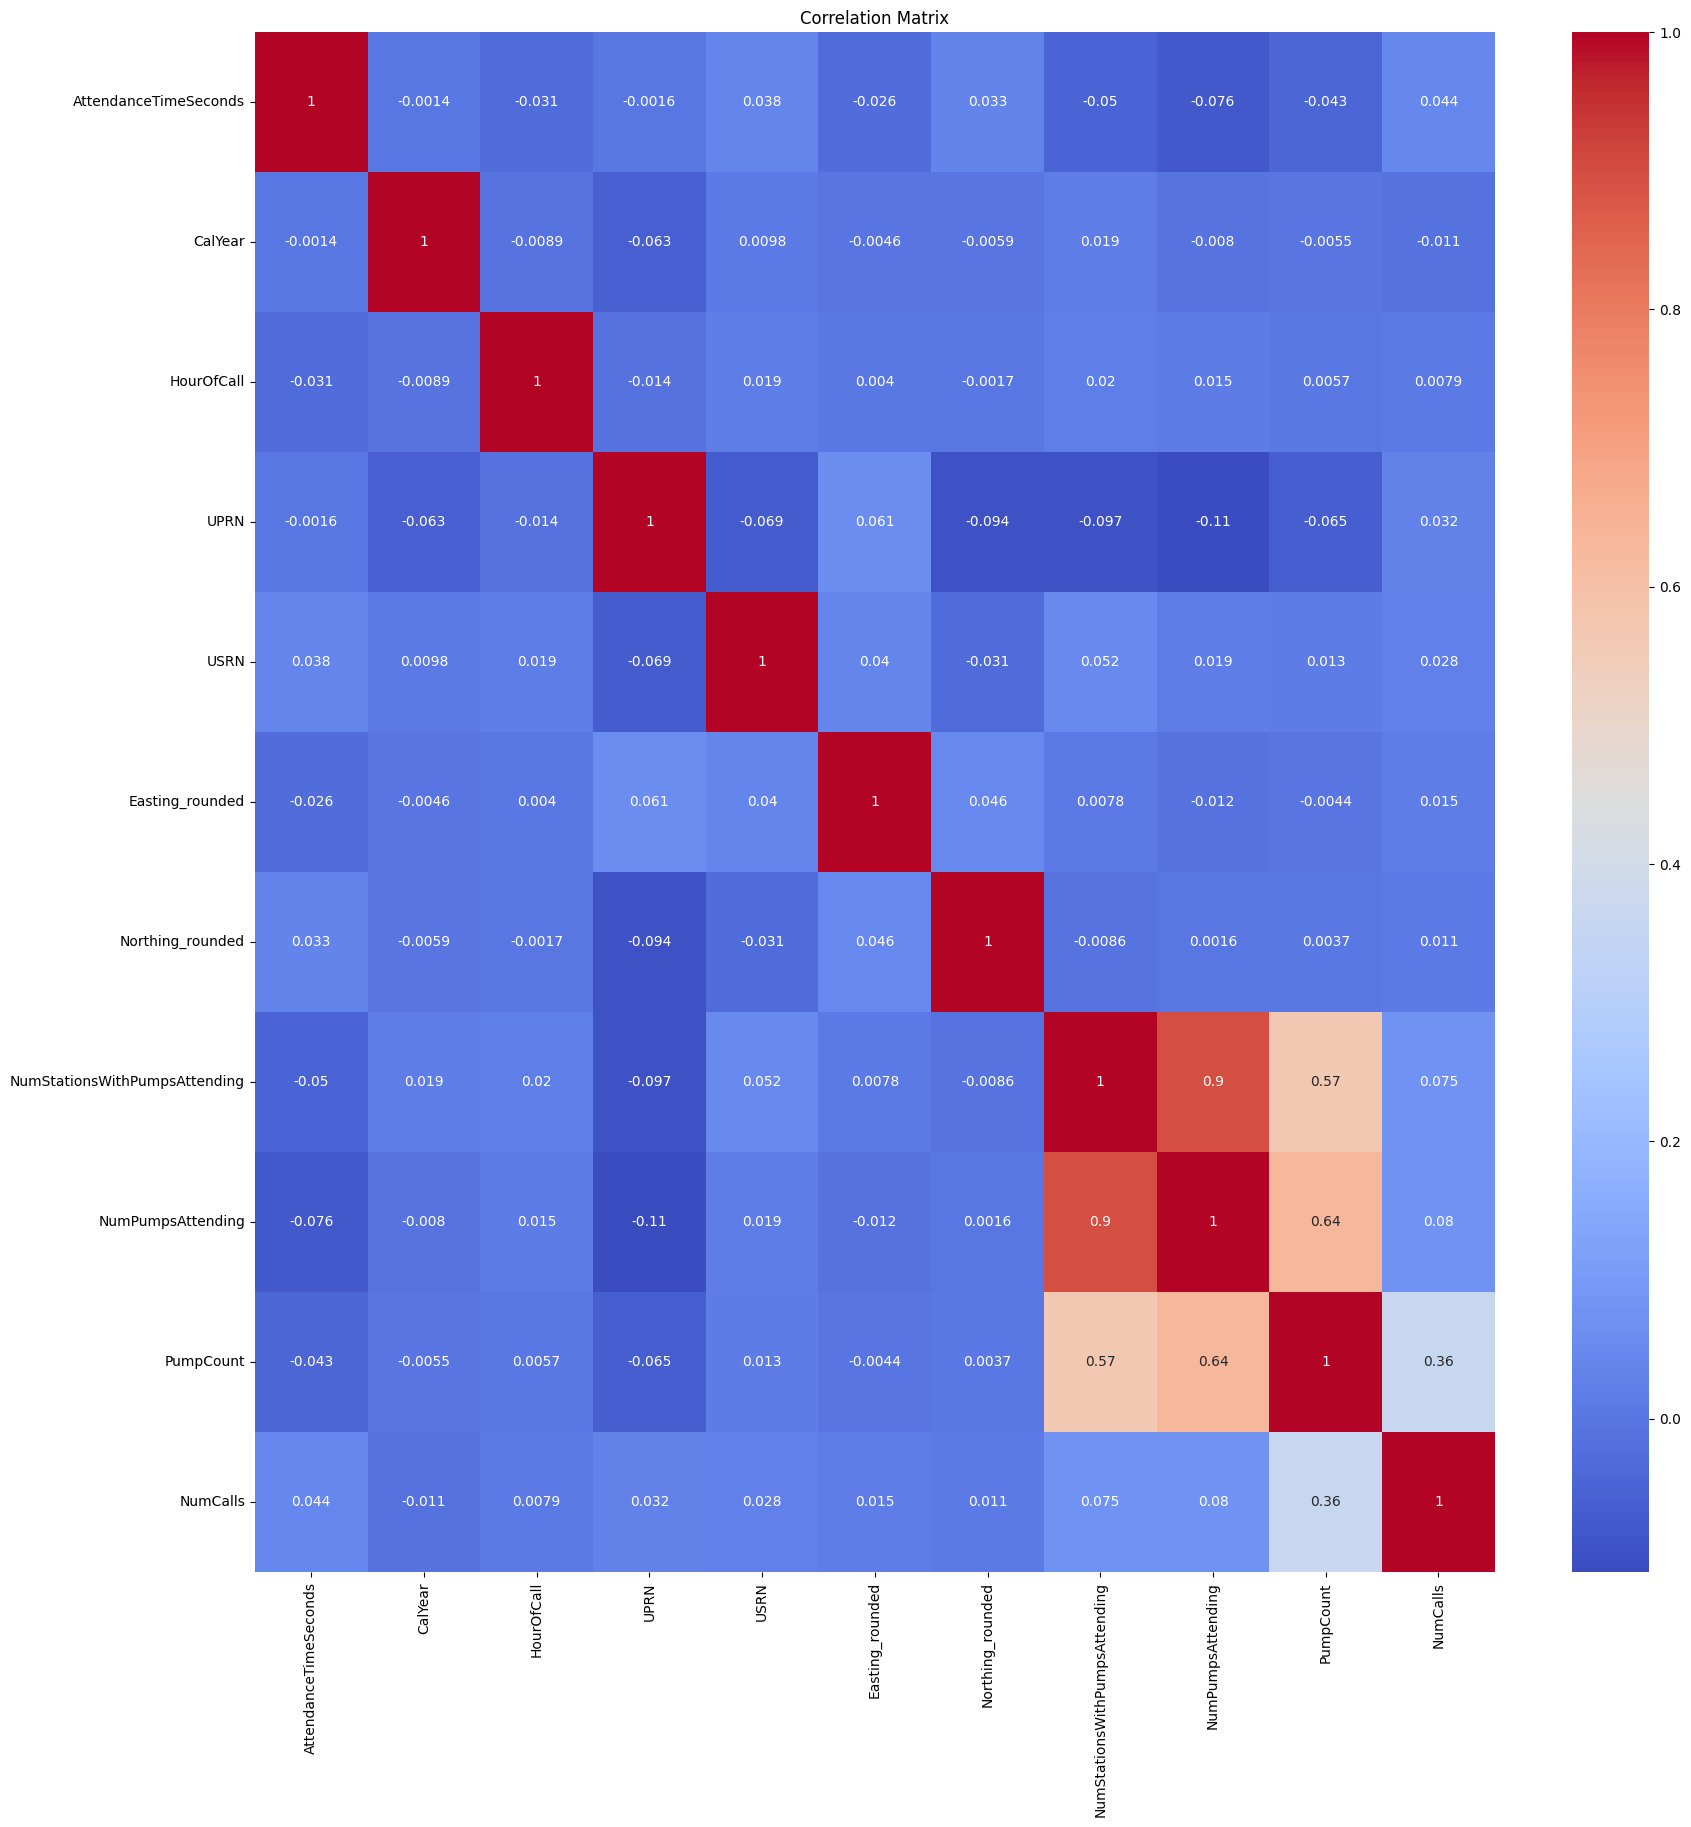

In [55]:
plt.figure(figsize = (20,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()